In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error

In [2]:
try:
    # Intentar leer el archivo localmente
    data = pd.read_csv('../data/Steel_industry_data.csv')
except FileNotFoundError:
    # Si no se encuentra, leer desde la URL
    data = pd.read_csv(
        'https://raw.githubusercontent.com/luis-huacho/INF648-Proy-Curso-2024-01/main/data/Steel_industry_data.csv')

# Seleccionar las columnas para la regresión
features = data.drop(columns=['date', 'Usage_kWh'])
target = data['Usage_kWh']
categorical_features = features[['WeekStatus', 'Day_of_week', 'Load_Type']]
numerical_features = features.drop(columns=categorical_features)
X_categorical = pd.get_dummies(categorical_features, columns=["Day_of_week", "Load_Type", "WeekStatus"], drop_first=False)

scaler = StandardScaler()
X_numerical = scaler.fit_transform(numerical_features)
X_numerical_ = pd.DataFrame(X_numerical, columns=numerical_features.columns)

X = pd.concat([X_numerical_, X_categorical], axis=1)

In [4]:
y = target

In [7]:
from sklearn.metrics import mean_absolute_error, r2_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el preprocesador
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), df_X.columns)
#     ]
# )

# Definir el ensamble de modelos
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('lr', LinearRegression())
]

stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()
)

# Crear el pipeline que incluye el preprocesador y el modelo
model_pipeline = Pipeline(steps=[
    # ('preprocessor', preprocessor),
    ('regressor', stacking_regressor)
])

# Entrenar el modelo
model_pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred_train = model_pipeline.predict(X_train)
y_pred_test = model_pipeline.predict(X_test)

# Evaluar el modelo
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Métricas en el conjunto de entrenamiento:")
print(f"MSE Train: {mse_train}")
print(f"MAE Train: {mae_train}")
print(f"RMSE Train: {rmse_train}")
print(f"R2 Train: {r2_train}")

print(f"\nMétricas en el conjunto de prueba:")
print(f"MSE Test: {mse_test}")
print(f"MAE Test: {mae_test}")
print(f"RMSE Test: {rmse_test}")
print(f"R2 Test: {r2_test}")


Métricas en el conjunto de entrenamiento:
MSE Train: 0.14715054922072143
MAE Train: 0.13856898109529284
RMSE Train: 0.38360207144998765
R2 Train: 0.9998678945281653

Métricas en el conjunto de prueba:
MSE Test: 1.0955112084916296
MAE Test: 0.343046618919182
RMSE Test: 1.0466667131860217
R2 Test: 0.9990362543498436


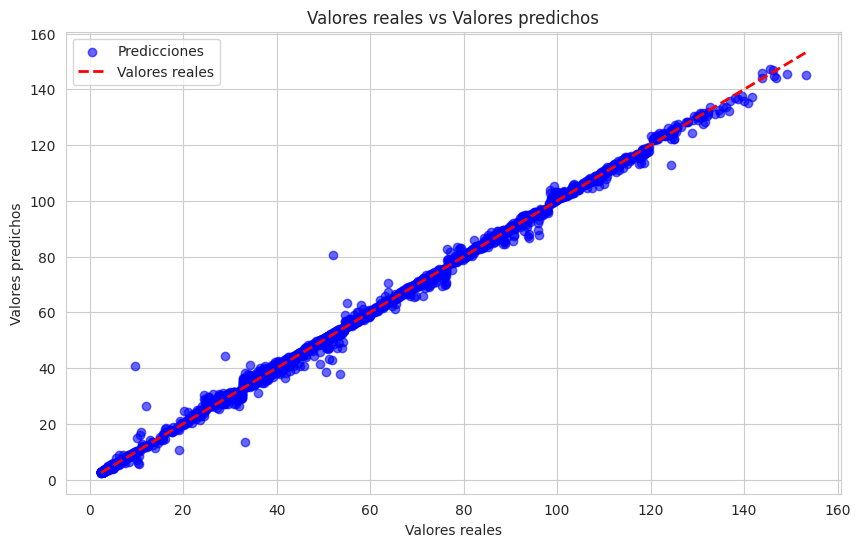

In [8]:
from matplotlib import pyplot as plt

# Graficar y_test vs y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='b', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Valores reales')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs Valores predichos')
plt.legend()
plt.show()